In [2]:
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
%matplotlib notebook


#https://github.com/scikit-optimize/scikit-optimize/tree/master/examples
from skopt import gp_minimize
from skopt.plots import plot_convergence
from skopt.space import Real, Integer, Categorical

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [3]:
from skopt.plots import plot_convergence

def plot_bayesian(ax, accuracies):
    x = np.linspace(0,1,len(accuracies))
    for line in ax.lines:
        line.set_xdata(x)
        y = accuracies
        line.set_ydata(y)
    y = accuracies
    ax.plot(x, y)
    fig.canvas.draw()


In [4]:
# Colour data
import colour_data as colour
X_train, X_test, y_train, y_test = colour.X_train, colour.X_test, colour.y_train, colour.y_test
colour_transformer = FunctionTransformer(colour.pix2lab)

<IPython.core.display.Javascript object>


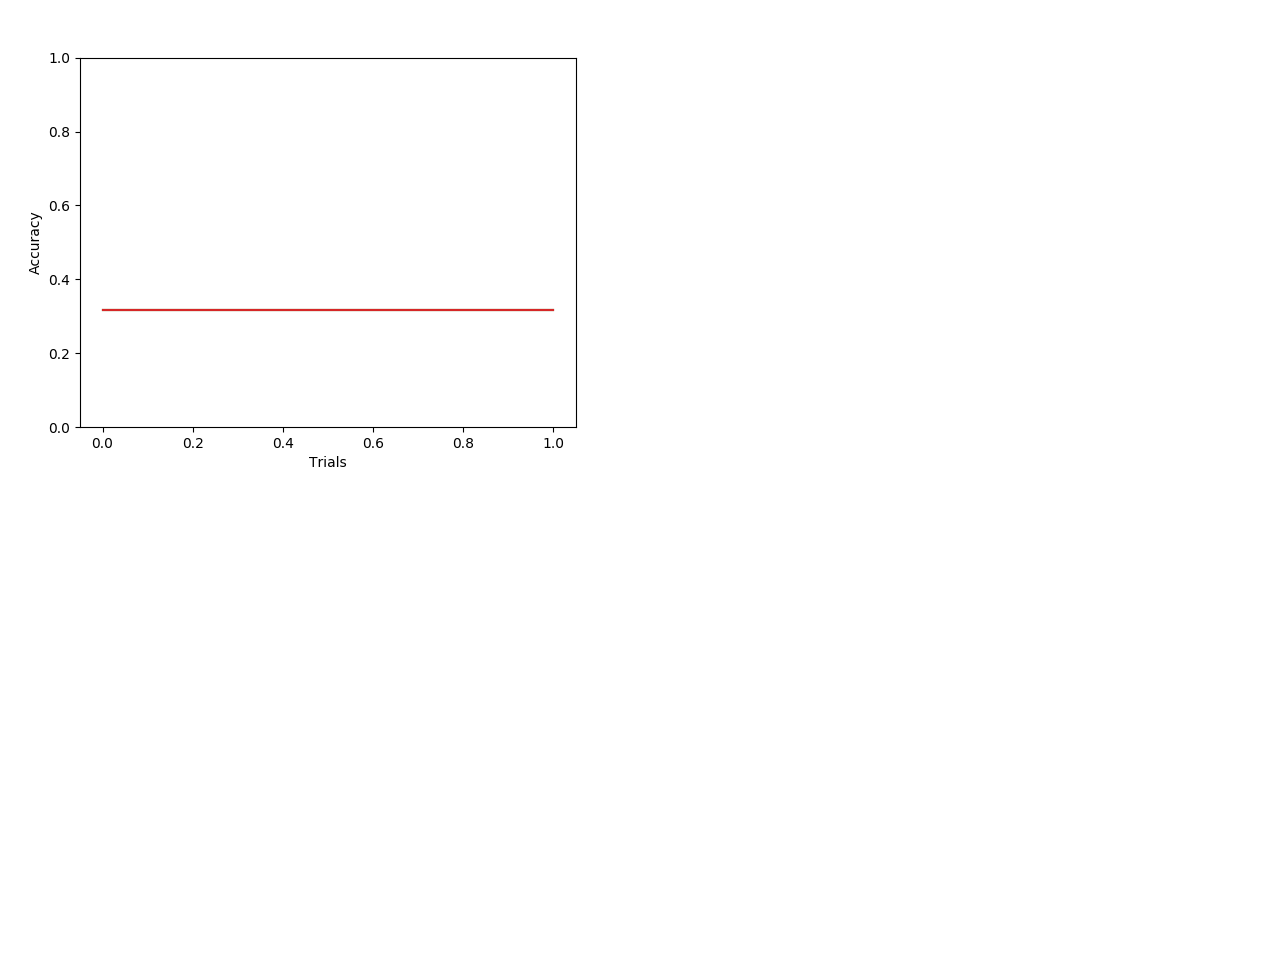

Current accuracy: 0.315789473684
Current accuracy: 0.315789473684
Current accuracy: 0.315789473684
Current accuracy: 0.315789473684


In [ ]:
# Colour SVM
from sklearn.svm import SVC

accuracies = []
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Trials')
ax.set_ylabel('Accuracy')
ax.set_ylim(0,1)

def colour_svm_objective(params):
    svm_model = make_pipeline( colour_transformer, SVC(
        C= params[0], 
        kernel= params[1], 
#         degree= params[2], 
#         gamma= params[3], 
#         coef0= params[4], 
#         shrinking= params[5], 
#         probability= params[6], 
        decision_function_shape= 'ovr',
    ))
    svm_model.fit(X_train, y_train)
    y_predicted = svm_model.predict(X_test)
    acc = accuracy_score(y_test, y_predicted)
    print("Current accuracy:", acc)
    accuracies.append(acc)
    plot_bayesian(ax, accuracies)
    return 1 - acc

colour_svm_space = [
    Real(1,100), # C
    Categorical(['poly', 'rbf']), # kernel
#     Integer(1,6), # degree for 'poly'
#     Real(0,1), # gamma
#     (1,1000), # coef0
#     (True,False), # shrinking
#     (True,False), # probability
]

calls = 11
colour_result = gp_minimize(colour_svm_objective, colour_svm_space, n_calls=calls, random_state=0)

print("Best score with", calls, "calls:", 1 - colour_result.fun)

print("Best parameters:")
print("- c=%d"%(colour_result.x[0]))
print("- kernel=%r"%(colour_result.x[1]))
# print("- degree=%d"%(colour_result.x[2]))
# print("- gamma=%.4f"%(colour_result.x[3]))
# print("- coef0=%d"%(colour_result.x[4]))
# print("- shrinking=%r"%(colour_result.x[5]))
# print("- probability=%r"%(colour_result.x[6]))

plot_convergence(colour_result);
plt.show()

<IPython.core.display.Javascript object>


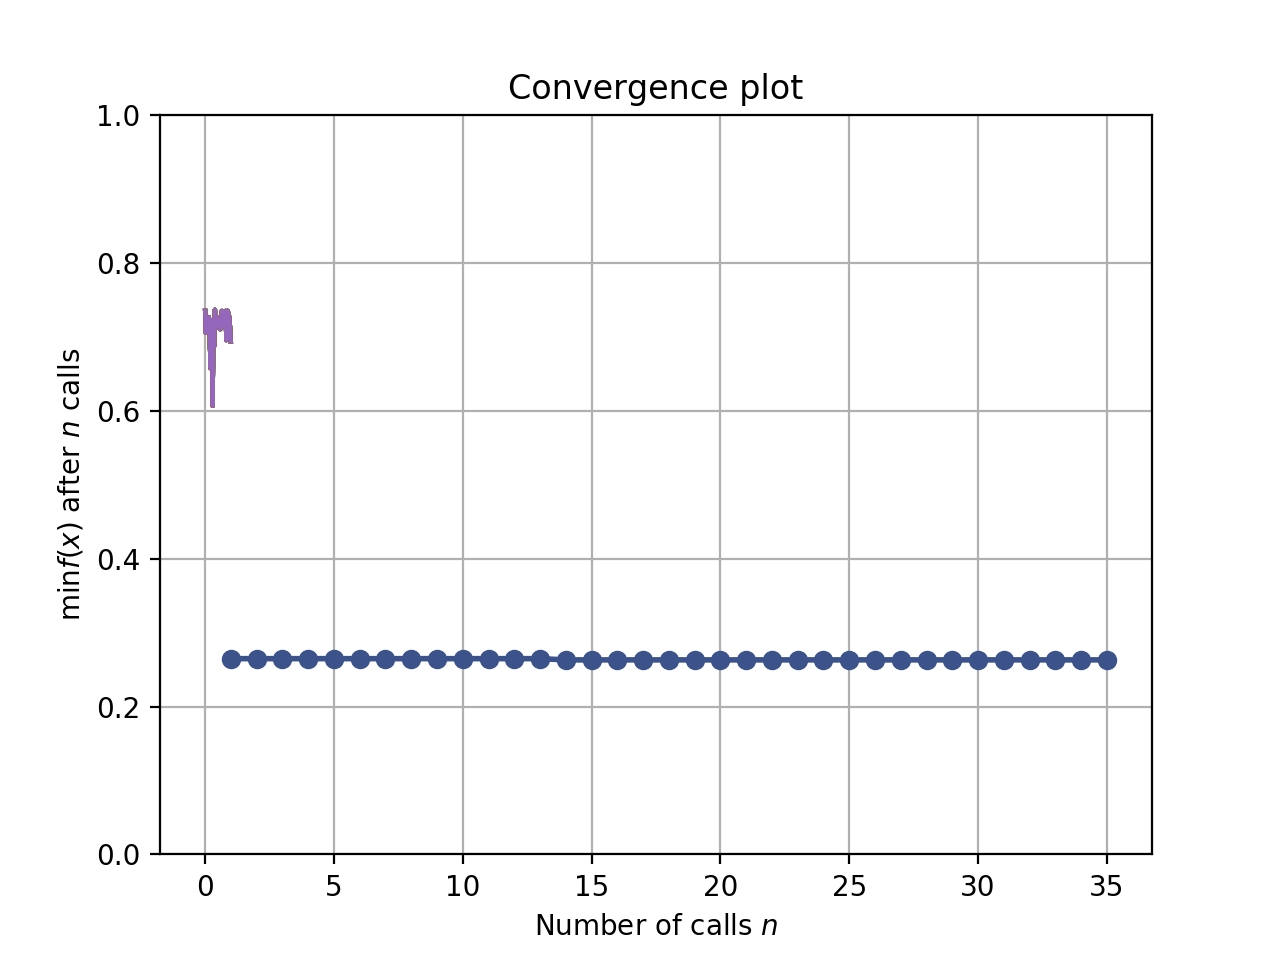

Current accuracy: 0.735197368421
Current accuracy: 0.705592105263
Current accuracy: 0.71875
Current accuracy: 0.717105263158
Current accuracy: 0.723684210526
Current accuracy: 0.726973684211
Current accuracy: 0.712171052632
Current accuracy: 0.657894736842
Current accuracy: 0.720394736842
Current accuracy: 0.717105263158
Current accuracy: 0.606907894737
Current accuracy: 0.723684210526
Current accuracy: 0.6875
Current accuracy: 0.736842105263
Current accuracy: 0.712171052632
Current accuracy: 0.726973684211
Current accuracy: 0.725328947368
Current accuracy: 0.720394736842
Current accuracy: 0.715460526316
Current accuracy: 0.722039473684
Current accuracy: 0.710526315789
Current accuracy: 0.712171052632
Current accuracy: 0.735197368421
Current accuracy: 0.722039473684
Current accuracy: 0.720394736842
Current accuracy: 0.715460526316
Current accuracy: 0.723684210526
Current accuracy: 0.735197368421
Current accuracy: 0.695723684211
Current accuracy: 0.735197368421
Current accuracy: 0.73519

In [5]:
# Colour KNN
from sklearn.neighbors import KNeighborsClassifier

accuracies = []
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Trials')
ax.set_ylabel('Accuracy')
ax.set_ylim(0,1)

def colour_knn_objective(params):
    knn_lab_model = make_pipeline(colour_transformer, KNeighborsClassifier(
        n_neighbors=params[0], 
        leaf_size=params[1], 
        p=params[2], 
        algorithm='auto', 
        n_jobs=-1, # use all cores
    ))
    knn_lab_model.fit(X_train, y_train)
    y_predicted = knn_lab_model.predict(X_test)
    acc = accuracy_score(y_test, y_predicted)
    accuracies.append(acc)
    plot_bayesian(ax, accuracies)
    return 1 - acc

colour_knn_space = [
    Integer(1, 55),    # n_neighbors=params[0], 
    Integer(2, 100),    # leaf_size=params[1], 
    Integer(1, 6)    # p=params[2], 
]


calls = 35
colour_knn_result = gp_minimize(colour_knn_objective, colour_knn_space, n_calls=calls)

print("Best score with", calls, "calls:", 1 - colour_knn_result.fun)

print("Best parameters:")
print("- neighbors=%d"%(colour_knn_result.x[0]))
print("- leaf-size=%d"%(colour_knn_result.x[1]))
print("- p=%d"%(colour_knn_result.x[2]))
plot_convergence(colour_knn_result);
plt.show()

<IPython.core.display.Javascript object>


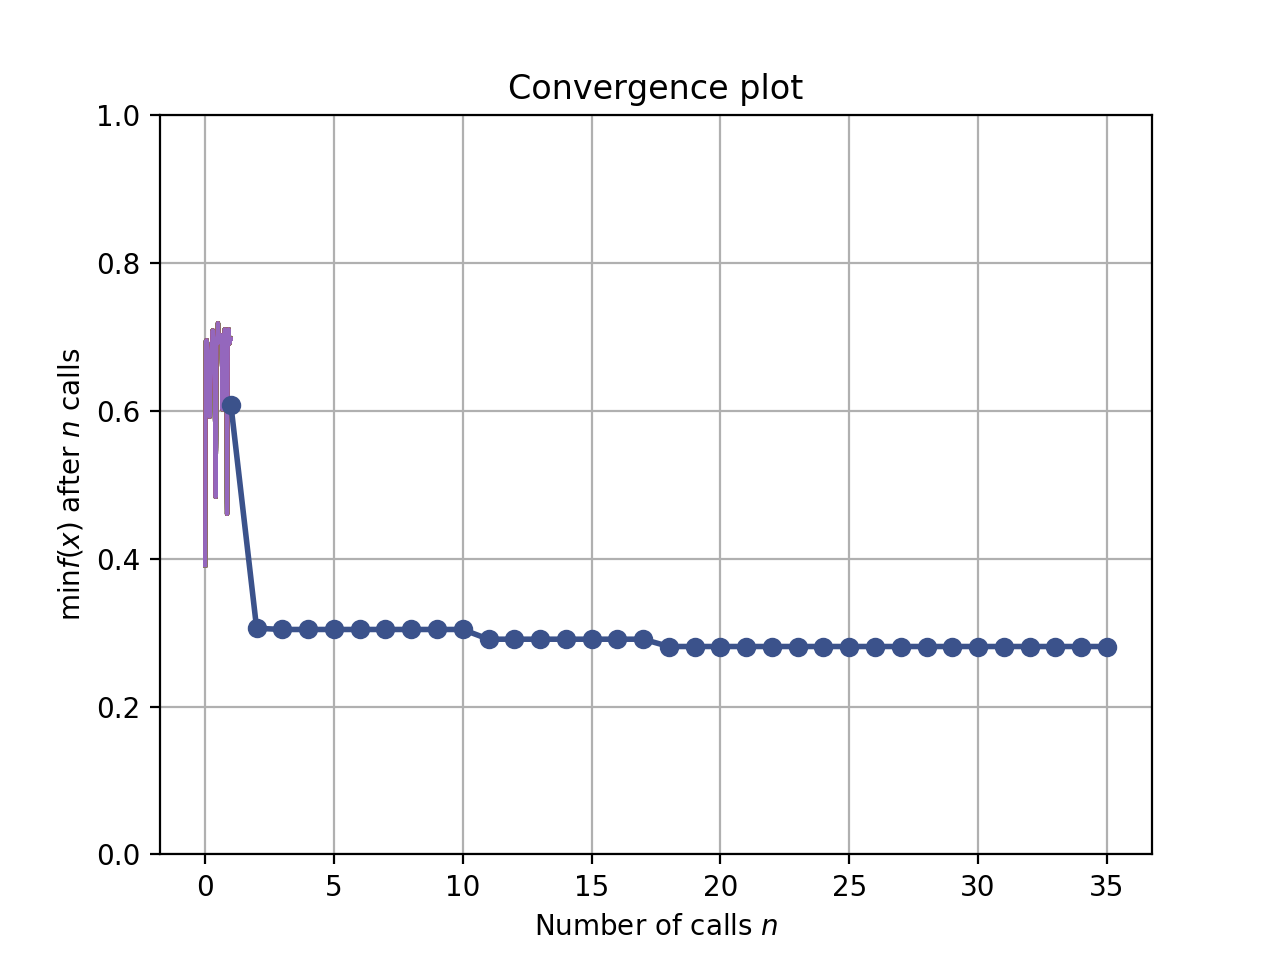

Best score with 35 calls: 0.71875
Best parameters:
- hidden_layer_size=(25, 25)


In [6]:
# Colour Perceptron
from sklearn.neural_network import MLPClassifier

accuracies = []
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Trials')
ax.set_ylabel('Accuracy')
ax.set_ylim(0,1)

def colour_mlp_objective(params):
    MLP_lab_model = make_pipeline(colour_transformer, MLPClassifier(
        hidden_layer_sizes=(params[0], params[1]), 
        activation='relu', 
        solver='adam', 
        alpha=0.0001, 
        batch_size='auto', 
        learning_rate='constant', 
        learning_rate_init=0.001, 
        power_t=0.5, 
        max_iter=params[2], 
        shuffle=True, 
        random_state=None, 
        tol=0.0001, 
        verbose=False, 
        warm_start=True, 
        momentum=0.9, 
        nesterovs_momentum=True, 
        early_stopping=False, 
        validation_fraction=0.1, 
        beta_1=0.9, 
        beta_2=0.999, 
        epsilon=1e-08))
    MLP_lab_model.fit(X_train, y_train)
    y_predicted = MLP_lab_model.predict(X_test)
    acc = accuracy_score(y_test, y_predicted)
    accuracies.append(acc)
    plot_bayesian(ax, accuracies)
    return 1 - acc

colour_mlp_space = [
    Integer(2, 25),    # hideen_layer_size[0], 
    Integer(2, 25),    # hideen_layer_size[1], 
    Integer(1300, 2000) # max_iter
]

calls = 35
colour_mlp_result = gp_minimize(colour_mlp_objective, colour_mlp_space, n_calls=calls)

print("Best score with", calls, "calls:", 1 - colour_mlp_result.fun)

print("Best parameters:")
print("- hidden_layer_size=(%d, %d)"%(colour_mlp_result.x[0], colour_mlp_result.x[1]))

plot_convergence(colour_mlp_result);
plt.show()